In [1]:
import pandas as pd

In [2]:
crop = pd.read_csv(r'C:\Users\91984\Downloads\Crop_recommendation.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#Normalization
from sklearn.preprocessing import RobustScaler
data = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']
scaler = RobustScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[ 0.83794466 -0.225       0.37931034 ...  0.0515245   0.08187409
   1.80970317]
 [ 0.75889328  0.175       0.31034483 ... -0.0051707   0.64399517
   2.20691785]
 [ 0.36363636  0.1         0.4137931  ...  0.06223696  1.48659293
   2.83168879]
 ...
 [ 1.28063241 -0.45       -0.06896552 ... -0.44625943 -0.06558898
   1.31380951]
 [ 1.26482213 -0.475       0.06896552 ... -0.9548262   0.35059336
   0.54102359]
 [ 1.05928854 -0.825      -0.06896552 ... -0.67628235  0.37269542
   0.77147757]]


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled,target,test_size = 0.2,random_state =2)

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {'kernel' : ['linear', 'poly','rbf','sigmoid'],
          'gamma':['scale', 'auto'],
         'decision_function_shape':['ovo', 'ovr']}
gs_SVC = GridSearchCV(SVC(), params, verbose=1, cv=3)
g_res_SVC= gs_SVC.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.1s finished


In [6]:
g_res_SVC.best_score_

0.98522694016935

In [7]:
g_res_SVC.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}

In [8]:
svm = SVC(kernel = 'linear', gamma = 'scale',decision_function_shape = 'ovo')
svm.fit(x_train, y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [9]:
# Training & Testing accuracy after applying hyper parameter
svm_train_accuracy = svm.score(x_train, y_train)
print("svm_train_accuracy = ",svm.score(x_train, y_train))
#Print Test Accuracy
svm_test_accuracy = svm.score(x_test, y_test)
print("svm_test_accuracy = ",svm.score(x_test, y_test))

svm_train_accuracy =  0.9914772727272727
svm_test_accuracy =  0.9818181818181818


In [10]:
acc = []
model = []

In [11]:
from sklearn.metrics import classification_report
from sklearn import metrics

predicted_values = svm.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('SVM')
print("SVM Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM Accuracy is:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

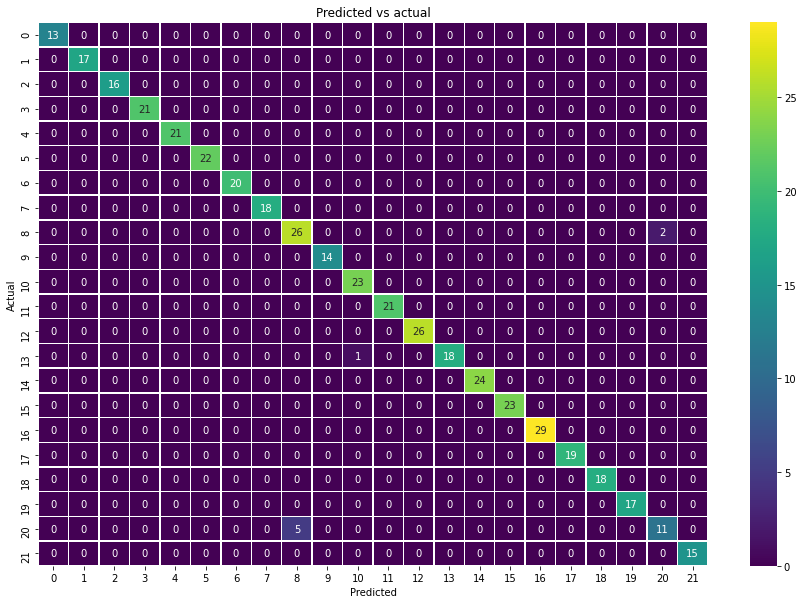

In [12]:
y_pred = svm.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()